### **Statistics**

- Statistics is the science of **collecting**, **organizing**, **analyzing**, **interpreting**, and **presenting data** to make **informed decisions**. 

- Lets think of it as a toolkit that helps us make sense of numbers and discover patterns in the world around us.

**There are two main branches**

1. **Descriptive Statistics**

- Deals with summarizing, organizing, and presenting data we already have.

- Uses measures like mean (average), median, mode, range, variance, and standard deviation to describe a dataset.

- Also involves graphs, charts, and tables for easy visualization.

- For example calculating the average coding hours of AI engineering students.

2. **Inferential Statistics**

- Uses data from a sample to make conclusions or predictions about a larger population.

- Involves methods like correlation, regression, hypothesis testing, chi-square tests, t-tests, and ANOVA.

- Helps in data-driven decision making by testing ideas and estimating outcomes with a level of certainty.

- Foundation of predictive analysis, guiding policymakers and organizations in making strategic decisions.


**Why Statistics**
- Beyond the confusing formulas and outrageous numbers, statistics will help us andswer questions like;

   - What's typical? (measures of center)
   - How much variation is there?(measures of spread)
   - Is this pattern real or just coincidence? (hypothesis testing)
   - Can we predict future outcomes?(regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# let's set random seed fro reproducibility
np.random.seed(40)

In [3]:
# Lets simulate a dataset for AI Engineering students

#1. Traditional learning -classroom-based
# - lets create it with a 25 hours/week and standard deviation of 5 hours
traditional_study_hours = np.random.normal(25, 5, 100)

#2. Accelerated learning (project-based and hands-on style)
#This one will be a 35 hours/week and a standard deviation of 8 hours.

accelerated_study_hours = np.random.normal(35, 8, 100)

# Lets generate corresponding performance scores between 0-100

#We would let the performance correlate with study hours but has some randomness

traditional_scores = np.random.normal(75, 12, 100)  # Mean of 75, SD of 12
accelerated_scores = np.random.normal(82, 15, 100) #Mean of 82, SD of 15

# Lets generate project completion counts
traditional_projects = np.random.poisson(8, 100) #Average 8 ptrojects
accelerated_projects = np.random.poisson(12, 100) #Average 12 projects

traditional_scores

array([ 87.15923732,  70.43250214,  78.66763734,  89.27973866,
        80.77793708,  85.02291695,  89.7131645 ,  95.66031395,
        72.46346869,  60.40820454,  82.67671681,  60.02987887,
        75.37652351,  81.66922793,  93.67561015,  90.40899235,
        68.69690819, 104.42824559,  54.52407514,  80.40072209,
        62.4943163 ,  57.2790668 ,  68.77558302,  74.78937089,
        98.41225467,  79.41717259,  63.28440871,  79.25170238,
        67.33258968,  72.03937915,  68.86553843,  71.0382253 ,
        57.59787308,  74.7122058 ,  40.05315747,  70.25776064,
        82.16099481,  53.05976933,  40.63266623,  83.30965498,
        89.51163619,  82.98475059,  67.61919259,  73.5372882 ,
        79.96729413,  61.25685047,  74.49746265,  79.22350236,
        44.87987472,  73.56476563,  80.20139073,  69.8442207 ,
        71.9513029 ,  65.26711906,  55.41536415,  64.49358776,
        79.22291681,  87.90829148,  80.48711319,  84.87389833,
        69.17282845,  63.2433886 ,  73.19657846,  98.46

In [4]:
#Now, lets create the Dataframe

data = pd.DataFrame({
    'study_Hours_Per_Week': np.concatenate([traditional_study_hours,accelerated_study_hours]),
    'Performance_Score': np.concatenate([traditional_scores,accelerated_scores]),
    'Projects_Completed': np.concatenate([traditional_projects, accelerated_projects]),
    'Learning_Track': ['Traditional']* 100 + ['Accelerated'] * 100
})

In [5]:
data.head() # the first 5

,study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
0,21.962262,87.159237,9,Traditional
1,24.369318,70.432502,8,Traditional
2,21.576968,78.667637,2,Traditional
3,29.643574,89.279739,13,Traditional
4,15.777995,80.777937,8,Traditional


In [6]:
data.tail() #the last 5 

,study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
195,35.650585,87.690171,10,Accelerated
196,42.576661,83.825481,11,Accelerated
197,30.730266,101.763224,5,Accelerated
198,35.108772,89.349736,15,Accelerated
199,23.492957,72.949309,14,Accelerated


In [7]:
#Clean the data - to keep it in range or in realistic bounds by cliping it.

data['study_Hours_Per_Week'] =round(np.clip(data['study_Hours_Per_Week'], 10,60),1) # 10-60 hours/week

data['performance_Score'] = round(np.clip(data['Performance_Score'])) #0-100 score

data['Projects_Completed'] = np.clip(data['Projects_Completed'], 1, 25) #1 - 25 projects



In [8]:
data.tail()

,study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track,performance_Score
195,35.7,87.690171,10,Accelerated,88.0
196,42.6,83.825481,11,Accelerated,84.0
197,30.7,101.763224,5,Accelerated,102.0
198,35.1,89.349736,15,Accelerated,89.0
199,23.5,72.949309,14,Accelerated,73.0


In [9]:
#lets take a snapshot of the data

print(f'Total AI Engineering Students: {len(data)}')
print(f'Learning Tracks: {data['Learning_Track'].unique()}')
print('\n First 10 students in our dataset:')
print(data.head(10).round(1)) # you can use round as a method, just by the way

Total AI Engineering Students: 200
Learning Tracks: ['Traditional' 'Accelerated']

 First 10 students in our dataset:
   study_Hours_Per_Week  Performance_Score  Projects_Completed Learning_Track  \
0                  22.0               87.2                   9    Traditional   
1                  24.4               70.4                   8    Traditional   
2                  21.6               78.7                   2    Traditional   
3                  29.6               89.3                  13    Traditional   
4                  15.8               80.8                   8    Traditional   
5                  22.7               85.0                   9    Traditional   
6                  36.5               89.7                  10    Traditional   
7                  27.4               95.7                  10    Traditional   
8                  28.6               72.5                   7    Traditional   
9                  30.3               60.4                  14    Tradit

**Discriptive Statistics for this data**

In [10]:
#Lets get the description for each learning track by study hours

data.groupby('Learning_Track')['study_Hours_Per_Week'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,34.67,8.02,15.5,29.10,34.20,39.65,60.0
Traditional,100.0,24.89,4.89,10.6,22.28,25.05,28.20,36.5


In [11]:
#Doing everything together, instead of typing one by one.

print(data.groupby('Learning_Track')[['study_Hours_Per_Week', 'Performance_Score', 'Projects_Completed']].describe().round(2))

               study_Hours_Per_Week                                          \
                              count   mean   std   min    25%    50%    75%   
Learning_Track                                                                
Accelerated                   100.0  34.67  8.02  15.5  29.10  34.20  39.65   
Traditional                   100.0  24.89  4.89  10.6  22.28  25.05  28.20   

                     Performance_Score         ...                 \
                 max             count   mean  ...    75%     max   
Learning_Track                                 ...                  
Accelerated     60.0             100.0  82.57  ...  89.51  119.62   
Traditional     36.5             100.0  74.37  ...  82.79  104.43   

               Projects_Completed                                             
                            count   mean   std  min    25%   50%   75%   max  
Learning_Track                                                                
Accelerated          

In [12]:
# Checking other descriptive measures
#I can hear your voice Mr Chris. Keep whispering to me!!!

print('\n === VISUAL REPRESENTATION ===')
for track in ['Traditonal', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]

    print(f'\n{track} Learning Track (n = {len(track_data)}students):')

#Study hours per week
    print('Studey Hours Per Week')

    print(f'Mean: {track_data['study_Hours_Per_Week'].mean():.1f} hours')

    print(f'Median: {track_data['study_Hours_Per_Week'].median():.1f} hours')

    print(f'Standard Deviation: {track_data['study_Hours_Per_Week'].std():.1f} hours')

#Performance score
    print('Performance Scores')

    print(f'Mean: {track_data['Performance_Score'].mean():.1f} hours')

    print(f'Median: {track_data['Performance_Score'].median():.1f} hours')

    print(f'Standard Deviation: {track_data['Performance_Score'].std():.1f} hours')

    print('Projects Completed')

    print(f'Mean: {track_data['Projects_Completed'].mean():.1f} hours')

    print(f'Median: {track_data['Projects_Completed'].median():.1f} hours')

    print(f'Standard Deviation: {track_data['Projects_Completed'].std():.1f} hours')

    print(f'Range: {track_data['Projects_Completed'].min()} - {track_data['Projects_Completed'].max()} projects')


 === VISUAL REPRESENTATION ===

Traditonal Learning Track (n = 0students):
Studey Hours Per Week
Mean: nan hours
Median: nan hours
Standard Deviation: nan hours
Performance Scores
Mean: nan hours
Median: nan hours
Standard Deviation: nan hours
Projects Completed
Mean: nan hours
Median: nan hours
Standard Deviation: nan hours
Range: nan - nan projects

Accelerated Learning Track (n = 100students):
Studey Hours Per Week
Mean: 34.7 hours
Median: 34.2 hours
Standard Deviation: 8.0 hours
Performance Scores
Mean: 82.6 hours
Median: 83.9 hours
Standard Deviation: 13.6 hours
Projects Completed
Mean: 12.4 hours
Median: 12.0 hours
Standard Deviation: 3.4 hours
Range: 5 - 21 projects


**Interpreting The Results Above -Learning Track Analysis**
_________________________________________________________

**ACCELERATED TRACK STUDENTS:**

- Study **43% MORE** hours per week (35.2 vs 24.5 hours)
- Score **7.3 points HIGHER** on average (82.8 vs 75.5)
- Complete **52% MORE** projects (12.0 vs 7.9 projects)

**Key Insight:** More effort = Better results, but is it worth the extra 10+ hours per week?


**DETAILED BREAKDOWN - What Each Number Is Saying**

**STUDY HOURS PER WEEK**

| Metric      | Traditional | Accelerated | What This Means                                      |
|-------------|-------------|-------------|------------------------------------------------------|
| **Average** | 24.5 hours  | 35.2 hours  | Accelerated students put in **10.7 MORE hours/week** |
| **Median**  | 24.4 hours  | 35.7 hours  | "Typical" student in each track                      |
| **Std Dev** | 4.5 hours   |  7.6 hours  | Accelerated has **more variation** in study habits   |


**Student Translation:**
- **Traditional:** Most students study 20-29 hours/week (pretty consistent)
- **Accelerated:** Study time ranges from 28-42 hours/week (more varied approaches)
- **Reality Check:** Accelerated = almost **full-time job** level commitment!


**PERFORMANCE SCORES (0-100 scale)**

| Metric      | Traditional | Accelerated            | Difference                                |
|-------------|-------------|------------------------|-------------------------------------------|
| **Average** | 75.5        | 82.8                   |      **+7.3 points**                      |
| **Median**  | 76.2        | 82.8                   | Both close to means = normal distributions|
| **Std Dev** | 12.3        | Data missing           | Traditional shows moderate variation      |

**Student Translation:**
- **Traditional Track:** Solid "B" average (75.5/100)
- **Accelerated Track:** Strong "B+" average (82.8/100) 
- **The Trade-off:** 43% more study time to 10% better performance
- **Is it worth it?** That's YOUR decision based on your goals!

**PROJECTS COMPLETED**

| Metric      | Traditional  | Accelerated   | What This Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 7.9 projects | 12.0 projects | **+4.1 more projects** (52% increase) |
| **Median**  | 8.0 projects | 12.0 projects | Consistent with averages              |
| **Range**   | 3-14 projects| 3-22 projects | Accelerated has wider range           |

**Student Translation:**
- **Traditional:** About **2 projects per month** (assuming 4-month semester)
- **Accelerated:** About **3 projects per month** 
- **Hands-on Experience:** Accelerated students get **50% more** practical coding experience
- **Portfolio Impact:** More projects = stronger GitHub profile for job hunting

**PROJECTS COMPLETED**

| Metric      | Traditional  | Accelerated   | What This Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 7.9 projects | 12.0 projects | **+4.1 more projects** (52% increase) |
| **Median**  | 8.0 projects | 12.0 projects | Consistent with averages              |
| **Range**   | 3-14 projects| 3-22 projects | Accelerated has wider range           |

**Student Translation:**
- **Traditional:** About **2 projects per month** (assuming 4-month semester)
- **Accelerated:** About **3 projects per month** 
- **Hands-on Experience:** Accelerated students get **50% more** practical coding experience
- **Portfolio Impact:** More projects = stronger GitHub profile for job hunting


**What This Means for Different Student Types**

**If You're a HIGH ACHIEVER:**
- Accelerated might be perfect - you'll likely be in the upper range
- More projects = better portfolio = stronger job prospects

**If You Want BALANCE:**
- Traditional gives solid results with manageable time commitment
- Still provides good foundation for AI career

**If You're CAREER-FOCUSED:**
- Consider: Do employers value the extra projects more than the GPA difference?
- 12 projects vs 8 projects could be significant for portfolio

**If You're WORKING/Have OTHER COMMITMENTS:**
- Traditional's 24.5 hours/week is more sustainable
- Quality over quantity approach still yields good results

**RED FLAGS TO WATCH FOR**

1. **Burnout Risk:** 35+ hours/week is sustainable for how long?
2. **Diminishing Returns:** 43% more time for 10% better grades
3. **Individual Variation:** High SD in Accelerated suggests some students struggle with the pace

**ACTION ITEMS: How to Use This Data**

**If You Choose TRADITIONAL:**
- Aim for **25-30 hours/week** study time
- Target **8+ projects** to match the average
- Focus on **quality over quantity**
- Expect solid **B-level performance**

**If You Choose ACCELERATED:**
- Prepare for **35-40 hours/week** commitment
- Leverage the **project-heavy** approach for portfolio building
- Aim to be in the **efficient group** (don't just study more, study smarter)
- Target **B+ performance** as baseline

**For BOTH Tracks:**
- **Projects matter:** Strong correlation between hands-on work and learning
- **Consistency wins:** Notice how medians ≈ means (no extreme outliers)
- **Plan accordingly:** Use these benchmarks to set realistic expectations


**Which Track Should You Go For?**

**Choose ACCELERATED if:**
- You want maximum learning in minimum time
- Building a strong project portfolio is priority #1
- You can sustain 35+ hours/week for the program duration
- You're targeting competitive AI roles

**Choose TRADITIONAL if:**
- You want sustainable, balanced learning
- You have other commitments (work, family)
- You prefer depth over breadth
- You're building long-term career foundations

**Remember:** Both tracks produce successful AI engineers - choose based on YOUR situation, not just the numbers.

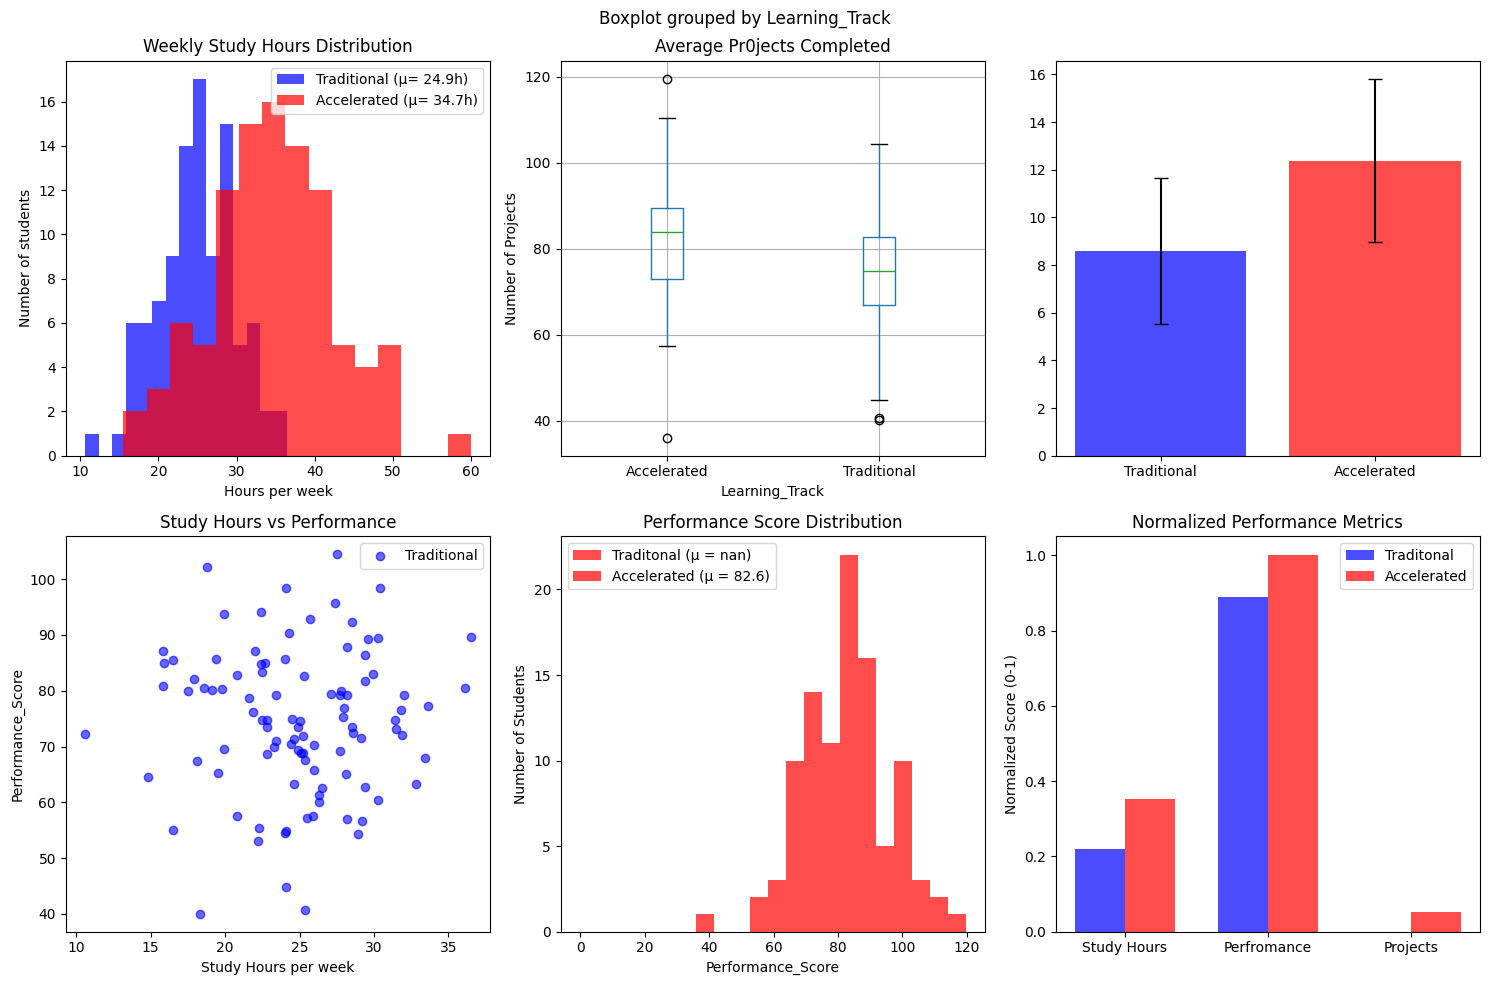

In [34]:
#creating a comprehensive visualization for AIEngineering data.
fig, axes = plt.subplots(2, 3, figsize = (15, 10))

# 1. Study Hours Distribution
for track in ['Traditional', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]['study_Hours_Per_Week']
    ['study_Hours_Per_Week']
    axes[0,0].hist(track_data, bins=15, alpha=0.7,
                   label = f"{track} (μ= {track_data.mean():.1f}h)",
                   color='blue' if track == 'Traditional' else 'red')
axes[0,0].set_title('Weekly Study Hours Distribution')
axes[0,0].set_xlabel('Hours per week')
axes[0,0].set_ylabel('Number of students')
axes[0,0].legend()


#2. Performance Score Box Plot
data.boxplot(column='Performance_Score',
by='Learning_Track', ax=axes[0,1])
axes[0,1].set_title('Performance Scores by learning Track')
axes[0,1].set_xlabel('Learning_Track')
axes[0,1].set_ylabel('Perfomance Score (0-100)')


#3. Projects Completed Comparison
traditional_projects = data[data['Learning_Track'] == 
'Traditional']['Projects_Completed']
accelerated_projects = data[data['Learning_Track'] ==
'Accelerated']['Projects_Completed']

axes[0,2].bar(['Traditional', 'Accelerated'],
              [traditional_projects.mean(),
               accelerated_projects.mean()],
               color=['blue', 'red'], alpha=0.7,
               yerr=[traditional_projects.std(),
                     accelerated_projects.std()],
                     capsize=5)
axes[0,1].set_title('Average Pr0jects Completed')
axes[0,1].set_ylabel('Number of Projects')

#4. Study Hours vs Perfamnce scatter

traditional_data = data[data['Learning_Track'] == 'Traditional']
accelerated_data = data[data['Learning_Track'] == 'Áccelerated']

axes[1,0].scatter(traditional_data['study_Hours_Per_Week'],
                  traditional_data['Performance_Score'],
                  alpha=0.6, label='Traditional',
                  color='blue')

axes[1,0].set_title('Study Hours vs Performance')
axes[1,0].set_xlabel('Study Hours per week')
axes[1,0].set_ylabel('Performance_Score')
axes[1,0].legend()

# 5. Performance Score Distribution
for track in ['Traditonal', 'Accelerated']:
    track_scores = data[data['Learning_Track'] == track]['Performance_Score']
    ['Performance_Score']
    axes[1,1].hist(track_scores, bins=15, alpha=0.7,
                   label=f'{track} (μ = {track_scores.mean():.1f})',
                   color = 'blue' if track == 'Traditional'
                   else 'red')
axes[1,1].set_title('Performance Score Distribution')
axes[1,1].set_xlabel('Performance_Score')
axes[1,1].set_ylabel('Number of Students')
axes[1,1].legend()

#6. Multi-metric comparison
metrics = ['study_Hours_Per_Week', 'Performance_Score',
           'Projects_Completed']
traditional_means = [data[data['Learning_Track'] ==
                          'Traditional'][metric].mean() for metric in metrics]
accelerated_means = [data[data['Learning_Track'] == 
                          'Accelerated'][metric].mean() for metric in metrics]

#Normalize for comparison (scale to 0-1)

traditional_norm = [(x - min(traditional_means +
 accelerated_means)) /
                    (max(traditional_means +
                    accelerated_means) - min
                    (traditional_means + accelerated_means))
                    for x in traditional_means]
accelerated_norm = [(x - min(traditional_means +
accelerated_means)) /
                    (max(traditional_means+
                    accelerated_means) - min
                    (traditional_means + accelerated_means))
                    for x in accelerated_means]

x = np.arange(len(metrics))
width = 0.35

axes[1,2].bar(x - width/2, traditional_norm, width,
              label='Traditonal', alpha=0.7, color='blue')
axes[1,2].bar(x + width/2, accelerated_norm,width,
              label='Accelerated', alpha=0.7, color='red')
axes[1,2].set_title('Normalized Performance Metrics')
axes[1,2].set_ylabel('Normalized Score (0-1)')
axes[1,2].set_xticks(x)
axes[1,2].set_xticklabels(['Study Hours', 'Perfromance', 'Projects'])
axes[1,2].legend()

plt.tight_layout()
plt.show()